<a href="https://colab.research.google.com/github/MarcoIntor/Repositorio-Marco/blob/main/Proyecto_2_Parte_I_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación basada en arboles / Proyecto 2-Parte I (Core)


**Objetivo:** Identificar cuál es el mejor modelo de aprendizaje supervisado para el dataset Water Quality.

https://www.kaggle.com/datasets/adityakadiwal/water-potability

## 1. Carga y Exploración Inicial de Datos:

In [ ]:
# Importa la librería pandas para manejar datos en formato de DataFrame
import pandas as pd

# Cargar el dataset desde Kaggle.
df = pd.read_csv('/content/water_potability.csv')

# Muestra las primeras 5 y 5 últimas filas del DataFrame para inspeccionar los datos
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Muestra información general sobre el DataFrame, incluyendo el número de entradas, columnas, tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Muestra estadísticas descriptivas del DataFrame, como el conteo, media, desviación estándar, valores mínimos y máximos, y los percentiles
print(df.describe())

# En la mayoría de variables observamos promedios y percentiles 50 similares, lo que significa una distribución simétrica
# Algunas variables tienen un std elevado, por lo tanto se recomienda estandarización

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [ ]:
# Muestra las dimensiones del DataFrame (número de filas y columnas)
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (3276, 10)


In [ ]:
# Comprobar los valores faltantes en cada columna del DataFrame y sumarlos
valores_nulos = df.isnull().sum()

# Imprime la cantidad de valores faltantes por cada columna
print("Valores faltantes por columna:\n", valores_nulos)

Valores faltantes por columna:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
# Imputar valores faltantes en la columna 'ph' con la mediana
df['ph'].fillna(df['ph'].median(), inplace=True)

# Imputar valores faltantes en la columna 'Sulfate' con la media
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)

# Imputar valores faltantes en la columna 'Trihalomethanes' con la mediana
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

# Verificar si aún quedan valores nulos
print("Valores faltantes por columna:\n", df.isnull().sum())

Valores faltantes por columna:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<ipython-input-6-ff82498024ec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].median(), inplace=True)
<ipython-input-6-ff82498024ec>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Importa la función zscore de scipy.stats para calcular el puntaje z (z-score) de cada valor
from scipy.stats import zscore

# Selecciona las columnas numéricas del DataFrame (tipos float64 e int64)
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Inicializa un diccionario para almacenar la cantidad de outliers por columna
outliers = {}

# Itera sobre cada columna numérica
for col in num_columns:
    # Calcula el z-score para cada valor en la columna
    z_scores = zscore(df[col])
    # Cuenta cuántos valores tienen un z-score absoluto mayor que 3 (considerados outliers)
    outliers[col] = (abs(z_scores) > 3).sum()

# Imprime el número de outliers encontrados por cada columna
print("Número de outliers por columna:\n", outliers)

# Encontramos valores outliers pero en pequeñas cantidades que no parecen representar un problema para el dataset

Número de outliers por columna:
 {'ph': np.int64(28), 'Hardness': np.int64(18), 'Solids': np.int64(20), 'Chloramines': np.int64(20), 'Sulfate': np.int64(34), 'Conductivity': np.int64(7), 'Organic_carbon': np.int64(4), 'Trihalomethanes': np.int64(18), 'Turbidity': np.int64(9), 'Potability': np.int64(0)}


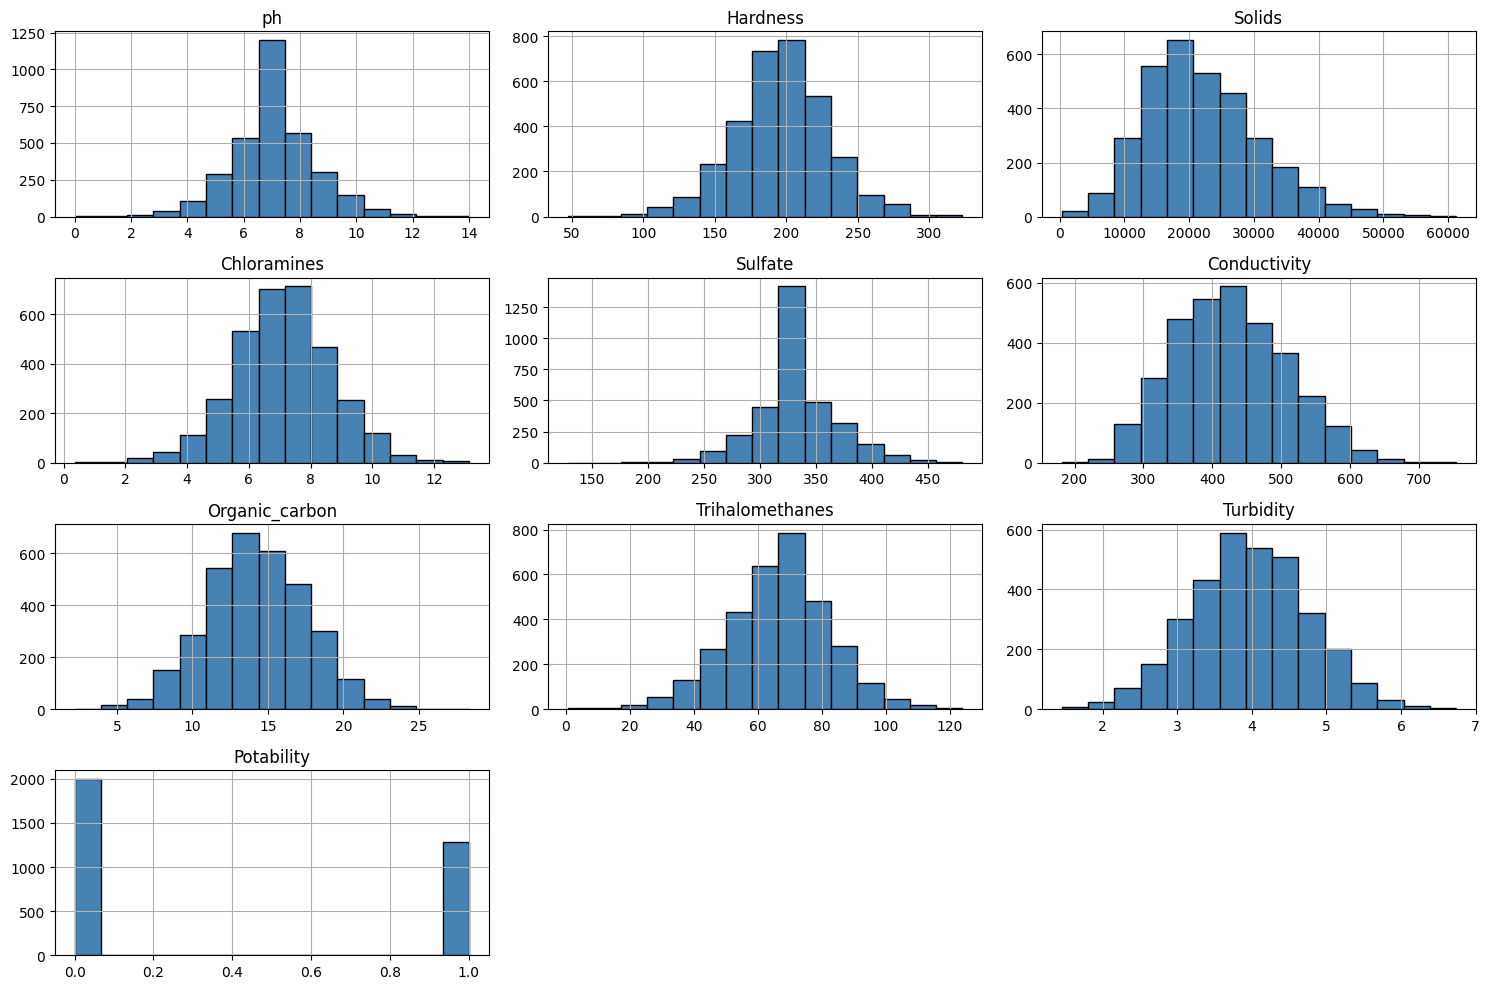

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver distribuciones de las variables numéricas
df.hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Las mayoría de las variables presentan una distribución normal

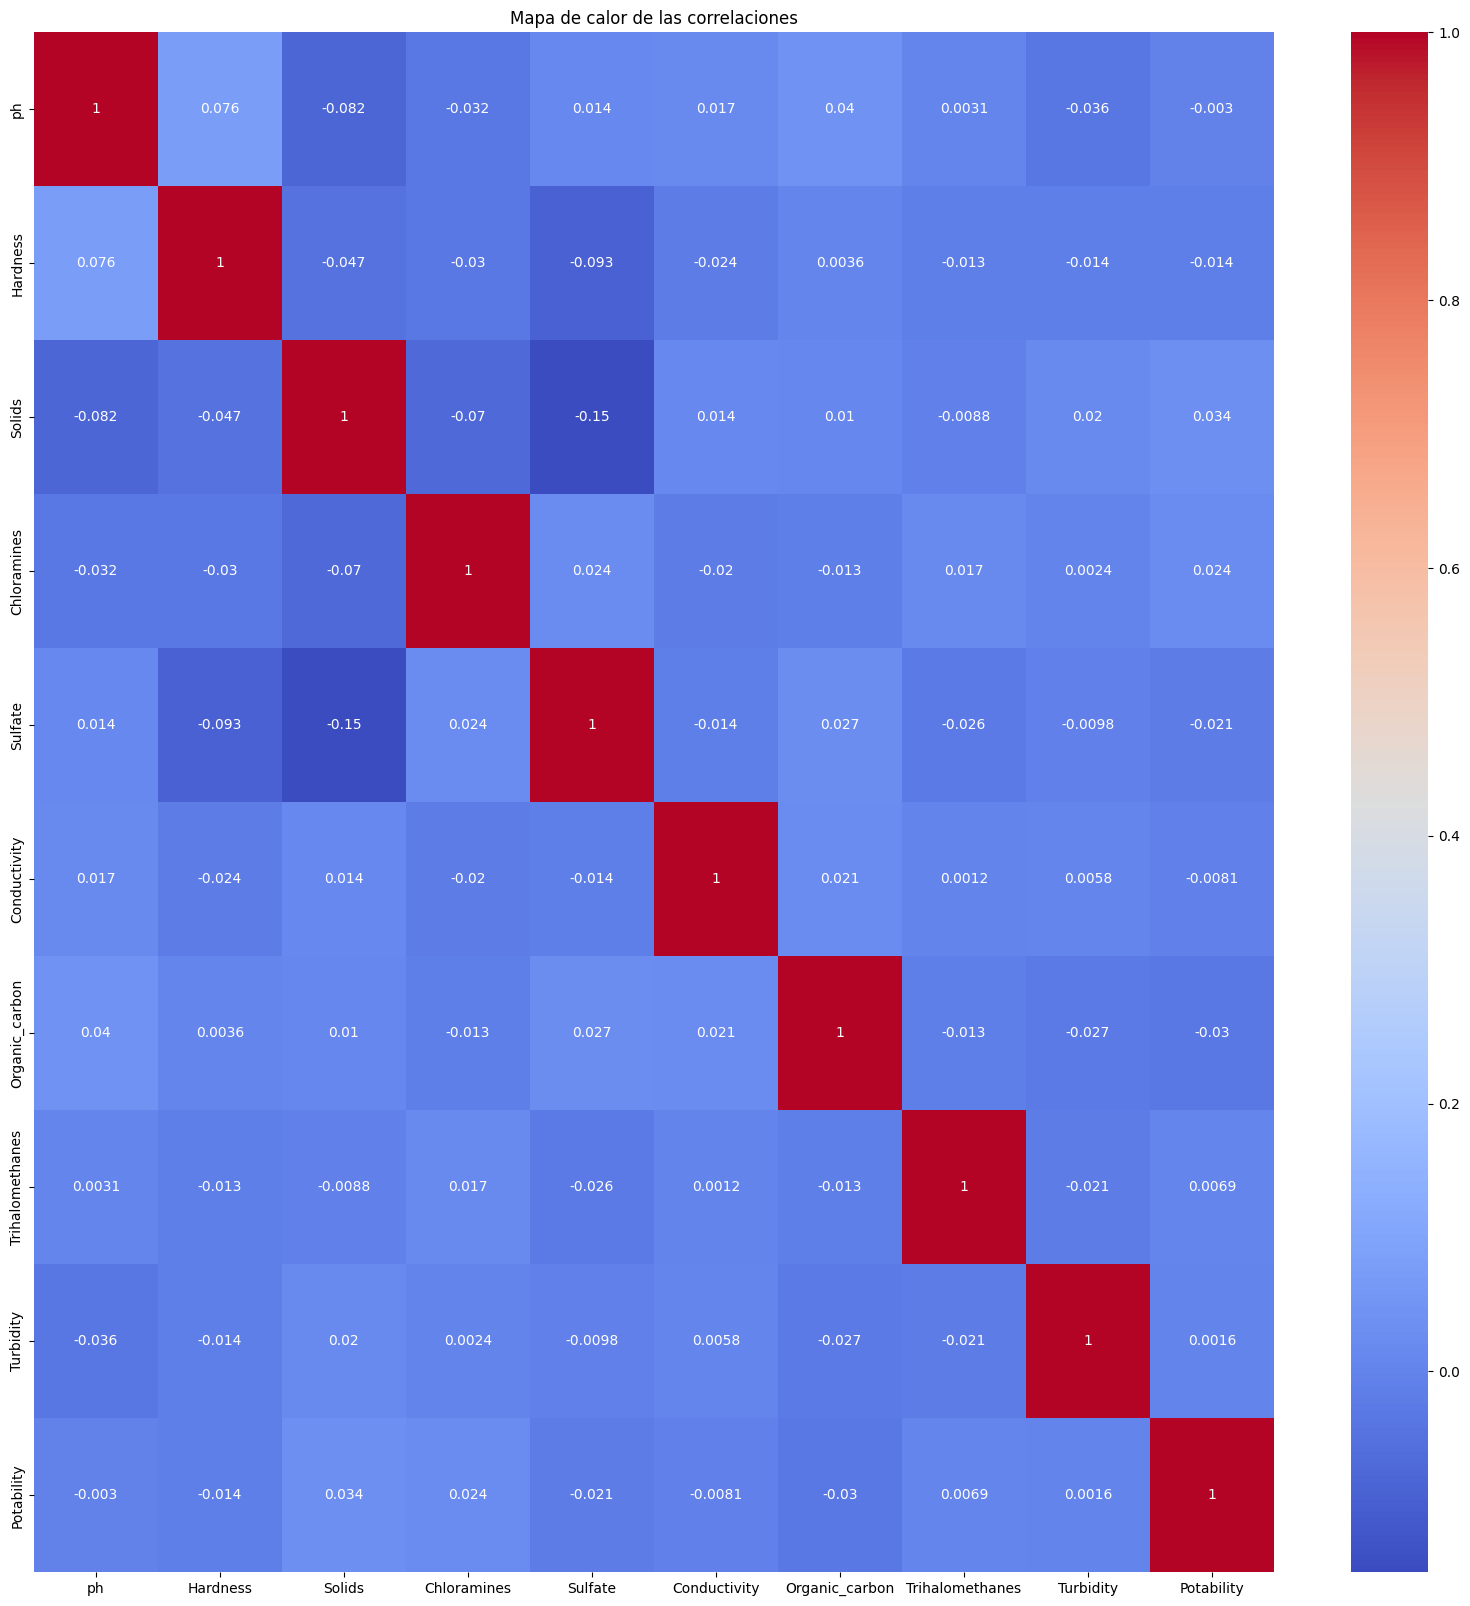

In [ ]:
# Verificar correlaciones

import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor de las correlaciones")
plt.show()

# No parece haber correlación entre las variables y la potabilidad del agua
# Se tomará en cuenta modelos que no sean lineales como bosques aleatorios para capturar relaciones más complejas

# Proyecto 2-Parte II (core)


## Parte 1: Preprocesamiento de Datos



### 1. a) Limpieza de Datos:

Manejar los outliers mediante técnicas de filtrado o transformación.



In [ ]:
# Manejo de outliers usando IQR
# Se eliminan outliers para modelos como regresión lineal y KNN, que son más sensibles a estos valores

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_limpio = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

### 1. b) Transformación de Columnas:


In [ ]:
# Importamos librerías
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.


In [ ]:
num_cols = df_limpio.drop(columns=["Potability"]).columns
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_cols)])
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

df_limpio[num_cols] = pipeline.fit_transform(df_limpio[num_cols])

<ipython-input-12-063281766c97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[num_cols] = pipeline.fit_transform(df_limpio[num_cols])


Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.


In [ ]:
# No tenemos variables categóricas

Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.


In [ ]:
# Se realizó en un paso anterior

### 1. c) Creación de Pipelines:


Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.


In [ ]:
# Se realizó en un paso anterior

Incluir todos los pasos de preprocesamiento en el pipeline.


In [ ]:
# Se realizó en un paso anterior

## Parte 2: Selección de Técnica de Machine Learning



### 2. a) Entrenamiento Inicial:


Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).


In [ ]:
# Separar características y variable objetivo
X = df_limpio.drop(columns=["Potability"])
y = df_limpio["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.


In [ ]:
# Evaluar modelos con validación cruzada
cv_scores = {name: cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean() for name, model in models.items()}
print("Resultados de validación cruzada:", cv_scores)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 636, number of negative: 1069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373021 -> initscore=-0.519280
[LightGBM] [Info] Start training from score -0.519280
[LightGBM] [Info] Number of positive: 637, number of negative: 1068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373607 -> initscore=-0.516773
[LightGBM] [Info] Start training from score -0.516773
[LightGBM] [Info] Numb

In [ ]:
# Selección del mejor modelo
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
print("Mejor modelo seleccionado:", best_model_name)

Mejor modelo seleccionado: Random Forest


### 2. b) Comparación de Modelos:


Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Métricas de rendimiento en el conjunto de prueba
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para ROC-AUC

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }

# Mostrar resultados
results_df = pd.DataFrame(results).T
print("\nMétricas de rendimiento en el conjunto de prueba:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 796, number of negative: 1336
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373358 -> initscore=-0.517836
[LightGBM] [Info] Start training from score -0.517836

Métricas de rendimiento en el conjunto de prueba:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.627341   0.000000  0.000000  0.000000  0.474417
KNN                  0.627341   0.500000  0.326633  0.395137  0.580012
Decision Tree        0.612360   0.478947  0.457286  0.467866  0.580882
Random Forest        0.659176   0.593407  0.271357  0.372414  0.625966
XGBoost              0.617978   0.480620  0.311558  0.378049  0.593415
LightGBM             0.634831   0.

Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.


In [ ]:
# Basándonos en las métricas, el mejor modelo es el Random Forest

## Parte 3: Optimización de Hiperparámetros



### 3. a) GridSearchCV:


Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.


Definir el espacio de búsqueda para los hiperparámetros relevantes.


In [ ]:
param_grid = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10]} if best_model_name in ["Random Forest", "XGBoost", "LightGBM"] else {}
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    print("Mejores hiperparámetros (GridSearchCV):", grid_search.best_params_)
    best_model_grid = grid_search.best_estimator_

Mejores hiperparámetros (GridSearchCV): {'max_depth': 10, 'n_estimators': 100}


In [ ]:
# Evaluamos el modelo optimizado por gridsearch.
y_pred_grid = best_model_grid.predict(X_test)
y_pred_proba_grid = best_model_grid.predict_proba(X_test)[:, 1]

results_grid = {
    "Accuracy": accuracy_score(y_test, y_pred_grid),
    "Precision": precision_score(y_test, y_pred_grid),
    "Recall": recall_score(y_test, y_pred_grid),
    "F1-Score": f1_score(y_test, y_pred_grid),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba_grid)
}

print("\nResultados GridSearchCV:")
print(pd.DataFrame(results_grid, index = [best_model_name]))


Resultados GridSearchCV:
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.674157   0.777778  0.175879  0.286885  0.630436


### 3. b) RandomizedSearchCV:


Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.


In [ ]:
from scipy.stats import randint
# RandomizedSearchCV
if best_model_name in ["Random Forest", "XGBoost", "LightGBM"]:
    param_dist = {
        "n_estimators": randint(50, 200),
        "max_depth": randint(3, 10)
    }
    random_search = RandomizedSearchCV(best_model, param_distributions=param_dist, n_iter=10, cv=5, scoring="accuracy", random_state=42)
    random_search.fit(X_train, y_train)
    print("Mejores hiperparámetros (RandomizedSearchCV):", random_search.best_params_)
    best_model_random = random_search.best_estimator_

Mejores hiperparámetros (RandomizedSearchCV): {'max_depth': 9, 'n_estimators': 142}


In [ ]:
# Evaluamos el modelo optimizado por randomsearch.
y_pred_random = best_model_random.predict(X_test)
y_pred_proba_random = best_model_random.predict_proba(X_test)[:, 1]

results_random = {
        "Accuracy": accuracy_score(y_test, y_pred_random),
        "Precision": precision_score(y_test, y_pred_random),
        "Recall": recall_score(y_test, y_pred_random),
        "F1-Score": f1_score(y_test, y_pred_random),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba_random)
    }

print("\nResultados RandomizedSearchCV:")
print(pd.DataFrame(results_random, index = [best_model_name]))


Resultados RandomizedSearchCV:
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.674157   0.804878  0.165829     0.275  0.624721


### 3. c) Optuna:

Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.


In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.5 MB/s eta 0:00:00


In [ ]:
# Optuna
best_model_optuna = best_model #guardamos el modelo base antes de optuna

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 3, 10)

    model = models[best_model_name]
    model.set_params(n_estimators=n_estimators, max_depth=max_depth)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
    return score

if best_model_name in ["Random Forest", "XGBoost", "LightGBM"]:
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    print("Mejores hiperparámetros (Optuna):", study.best_params)
    best_model_optuna.set_params(**study.best_params)

[I 2025-03-25 16:14:44,440] A new study created in memory with name: no-name-956d3464-1622-46ff-8959-a573c5e67b12
[I 2025-03-25 16:14:48,830] Trial 0 finished with value: 0.6379127222350498 and parameters: {'n_estimators': 137, 'max_depth': 8}. Best is trial 0 with value: 0.6379127222350498.
[I 2025-03-25 16:14:50,751] Trial 1 finished with value: 0.6383734098580554 and parameters: {'n_estimators': 73, 'max_depth': 7}. Best is trial 1 with value: 0.6383734098580554.
[I 2025-03-25 16:14:53,033] Trial 2 finished with value: 0.6271102021967874 and parameters: {'n_estimators': 139, 'max_depth': 3}. Best is trial 1 with value: 0.6383734098580554.
[I 2025-03-25 16:14:54,518] Trial 3 finished with value: 0.6322800189112818 and parameters: {'n_estimators': 61, 'max_depth': 6}. Best is trial 1 with value: 0.6383734098580554.
[I 2025-03-25 16:15:00,028] Trial 4 finished with value: 0.645410165913514 and parameters: {'n_estimators': 151, 'max_depth': 10}. Best is trial 4 with value: 0.64541016591

Mejores hiperparámetros (Optuna): {'n_estimators': 151, 'max_depth': 10}


In [ ]:
# Evaluamos el modelo optimizado por Optuna.
y_pred_optuna = best_model_optuna.predict(X_test)
y_pred_proba_optuna = best_model_optuna.predict_proba(X_test)[:, 1]

results_optuna = {
        "Accuracy": accuracy_score(y_test, y_pred_optuna),
        "Precision": precision_score(y_test, y_pred_optuna),
        "Recall": recall_score(y_test, y_pred_optuna),
        "F1-Score": f1_score(y_test, y_pred_optuna),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba_optuna)
}

print("\nResultados Optuna:")
print(pd.DataFrame(results_optuna, index = [best_model_name]))


Resultados Optuna:
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.659176   0.593407  0.271357  0.372414  0.625966


Consideramos como mejor hiperparámetros los obtenidos por GridSearchCV.

### 3. d) Evaluación de Modelos Optimizados:


Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.


Comparar el rendimiento del modelo optimizado con el modelo inicial.


In [ ]:
# Comparar resultados
print("\nMétricas de rendimiento (modelo inicial):")
print(pd.DataFrame(results).T)

print("\nMétricas de rendimiento (modelo optimizado):")
print(pd.DataFrame(results_grid, index = [best_model_name]))


Métricas de rendimiento (modelo inicial):
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.627341   0.000000  0.000000  0.000000  0.474417
KNN                  0.627341   0.500000  0.326633  0.395137  0.580012
Decision Tree        0.612360   0.478947  0.457286  0.467866  0.580882
Random Forest        0.659176   0.593407  0.271357  0.372414  0.625966
XGBoost              0.617978   0.480620  0.311558  0.378049  0.593415
LightGBM             0.634831   0.518182  0.286432  0.368932  0.625456

Métricas de rendimiento (modelo optimizado):
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.674157   0.777778  0.175879  0.286885  0.630436


## **Conclusiones**

* El modelo Random Forest tiene el mejor rendimiento en general. El modelo tiene la mejor exactitud y ROC-AUC, pero el recall sigue siendo bajo, el cual es importante en un problema relacionado a la salud como este.

* Con la optimización GridSearchCV, la precisión ha mejorado significativamente (0.777778). Esto significa que el modelo es mucho más confiable cuando predice "agua potable". Es decir, que cuando el modelo predice que el agua es potable, esta predicción es altamente acertada.

* Con la optimización GridSearchCV, el recall ha disminuido, lo que significa que el modelo está perdiendo aún más casos de agua potable. Esto es preocupante en este contexto.

* En este contexto, el recall es crucial. No detectar agua potable puede tener consecuencias negativas.

* Se recomienda explorar técnicas de sobremuestreo, considerar otros modelos más avanzados o realizar una ingeniería de características más exhaustiva.

